# Cryptominig firt 30 packets detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [2]:
df_features = pd.read_csv("../final_datasets/decrypto_dataset_design.csv")

In [22]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [23]:
import sklearn
pd.set_option('display.max_columns', None)

df_features = df_features[["LABEL"] + features].copy()

df_features['LABEL'] = df_features.LABEL.astype('category')
df_features["LABEL_code"] = df_features["LABEL"].cat.codes

for F in features:
    df_features.replace([np.inf], 0, inplace=True)
    df_features.replace([-np.inf], 0, inplace=True)
    df_features.loc[df_features[F].isnull(), F] = 0

In [24]:
df_features

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,True,2,2,148,439,273,205.766858,42341,-0.140430,128,419,291,75.372476,145,53.113553,309.794287,0.250024,0.500000,1.000000,2.0,2.000000,2.0,2.0,2.000000,0.500000,1
1,True,20,22,1877,6770,406,359.758252,129427,-0.060387,84,1440,1356,88.610407,216,53.201970,537.029468,6.137370,0.327778,5.900000,18.0,0.947368,0.0,2.0,1.052632,0.200000,1
2,True,7,7,1245,2957,576,440.507662,194048,-0.133292,315,1520,1205,76.477025,310,53.819444,706.463223,3.071602,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.666667,0.285714,1
3,True,2,2,148,439,273,205.766858,42341,-0.140430,128,419,291,75.372476,145,53.113553,309.794287,0.250024,0.500000,0.500000,1.0,1.000000,1.0,1.0,2.000000,0.500000,1
4,True,7,7,1245,2957,576,440.507662,194048,-0.133292,315,1520,1205,76.477025,310,53.819444,706.463223,3.071602,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.666667,0.285714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024898,False,27,20,10075,5634,589,548.652896,301020,-0.035465,98,1428,1330,93.149897,479,81.324278,798.024686,1.698800,0.800000,0.800000,1.0,0.041667,0.0,1.0,1.833333,0.640000,0
2024899,False,21,16,3004,6665,704,609.817186,371877,-0.071686,91,1406,1315,86.621759,559,79.403409,914.669749,0.993277,0.170765,10.416667,61.0,5.545455,0.0,60.0,1.454545,0.333333,0
2024900,False,2935,3317,1308550,2056112,815,432.278845,186865,-0.306845,176,1508,1332,53.040349,375,46.012270,919.222570,1.856038,0.550000,1.100000,2.0,0.068966,0.0,1.0,1.310345,0.500000,0
2024901,False,9,7,1102,4191,638,589.553221,347574,-0.039466,111,1520,1409,92.406461,486,76.175549,843.782481,1.440551,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.714286,0.375000,0


In [25]:
print(f"botnet: {len(df_features[df_features['LABEL'] == True])}\tclear: {len(df_features[df_features['LABEL'] == False])}")

botnet: 695496	clear: 1329407


In [26]:
df_features = df_features[["LABEL_code"] + features].copy()

In [27]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df_features = clean_dataset(df_features)

In [28]:
df_features.shape

(2024903, 25)

In [29]:
print(f"botnet: {len(df_features[df_features['LABEL_code'] == 1])}\tclear: {len(df_features[df_features['LABEL_code'] == 0])}")

botnet: 695496	clear: 1329407


In [30]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [31]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 600, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [32]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [4:25:58<00:00, 159.58s/trial, best loss: -0.9987100672299534]  
The best hyperparameters are :  

{'colsample_bytree': 0.8785050122955985, 'gamma': 2.1366545675669535, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.8734262036288427}


In [33]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      
      return model, X_test, y_test

99.92 & 99.91 & 99.86 & 99.88 \\


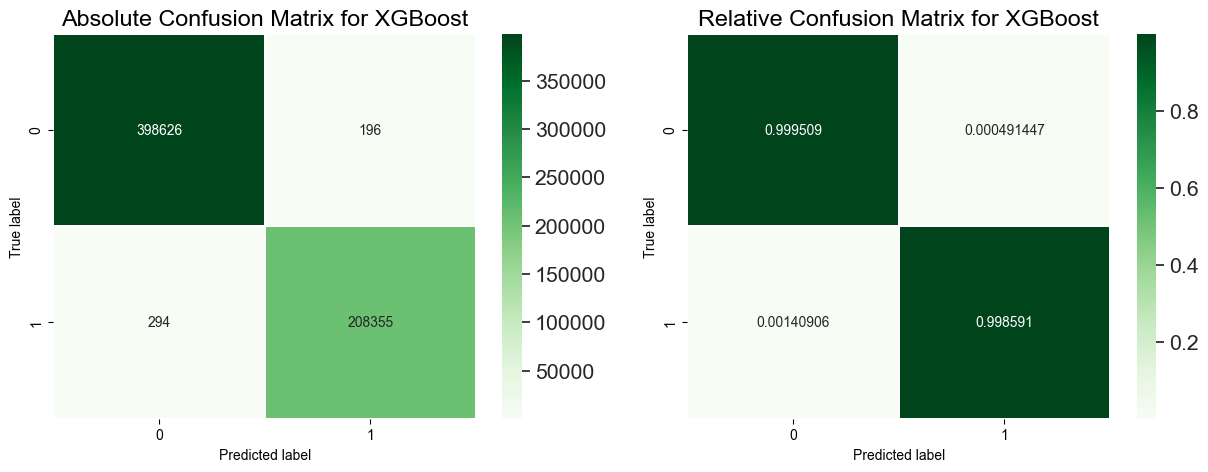

In [34]:
model, X_test, y_test = XGBoost_classification_tunned(best_hyperparams)

In [35]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

24


99.8923589218631
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.93 & 99.93 & 99.85 & 99.89 \\
\hline



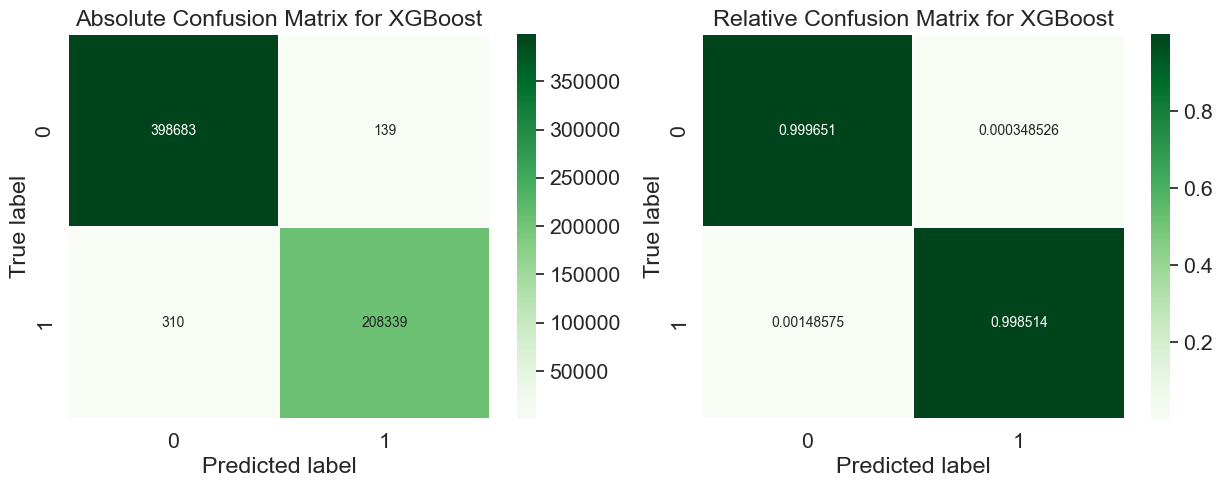

In [36]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

# Evaluation

In [3]:
df_validation = pd.read_csv("../final_datasets/decrypto_dataset_evaluation.csv")

In [4]:
df_validation

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,NaN,NaN,52168,4444,1.647758e+09,1.647758e+09,True,191,188,...,228.551015,1.278231,0.455309,61.466667,135.0,4.655172,0.0,15.0,2.000000,0.300000
1,1,NaN,NaN,50166,443,1.648240e+09,1.648240e+09,False,12,36,...,1067.957597,1.127692,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.692308,0.214286
2,2,NaN,NaN,37256,9033,1.647402e+09,1.647402e+09,False,117,124,...,652.523767,3.567438,0.589412,50.100000,85.0,2.931034,0.0,28.0,1.172414,0.366667
3,3,NaN,NaN,45339,443,1.646941e+09,1.646941e+09,False,7,9,...,979.016445,0.842347,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.500000,0.200000
4,4,NaN,NaN,43768,4444,1.647734e+09,1.647734e+09,True,172,162,...,257.177500,3.699268,0.498815,112.233333,225.0,7.758621,0.0,45.0,2.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075571,1075571,NaN,NaN,42662,4444,1.648406e+09,1.648406e+09,True,266,258,...,260.699252,3.975130,0.504930,143.400000,284.0,9.793103,0.0,59.0,2.000000,0.366667
1075572,1075572,NaN,NaN,48462,4444,1.646190e+09,1.646190e+09,True,224,212,...,306.403003,17.921043,0.467647,15.900000,34.0,1.172414,0.0,2.0,0.206897,0.033333
1075573,1075573,NaN,NaN,49122,80,1.648661e+09,1.648661e+09,False,6,4,...,261.428767,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,0.500000
1075574,1075574,NaN,NaN,1883,46166,1.647941e+09,1.647941e+09,False,20,40,...,62.000000,0.000000,0.500000,150.000000,300.0,15.000000,15.0,15.0,0.000000,0.047619


In [39]:
df_validation = df_validation[["LABEL"] + features].copy()

df_validation['LABEL'] = df_validation.LABEL.astype('category')
df_validation["LABEL_code"] = df_validation["LABEL"].cat.codes

for F in features:
    df_validation.replace([np.inf], 0, inplace=True)
    df_validation.replace([-np.inf], 0, inplace=True)
    df_validation.loc[df_validation[F].isnull(), F] = 0

In [40]:
print(f"botnet: {len(df_validation[df_validation['LABEL_code'] == 1])}\tclear: {len(df_validation[df_validation['LABEL_code'] == 0])}")

botnet: 392577	clear: 682999


In [41]:
df_validation = df_validation[["LABEL_code"] + features].copy()

In [42]:
df_validation = clean_dataset(df_validation)

In [43]:
print(f"botnet: {len(df_validation[df_validation['LABEL_code'] == 1])}\tclear: {len(df_validation[df_validation['LABEL_code'] == 0])}")

botnet: 392577	clear: 682999


\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.31 & 99.64 & 98.48 & 99.05 \\
\hline



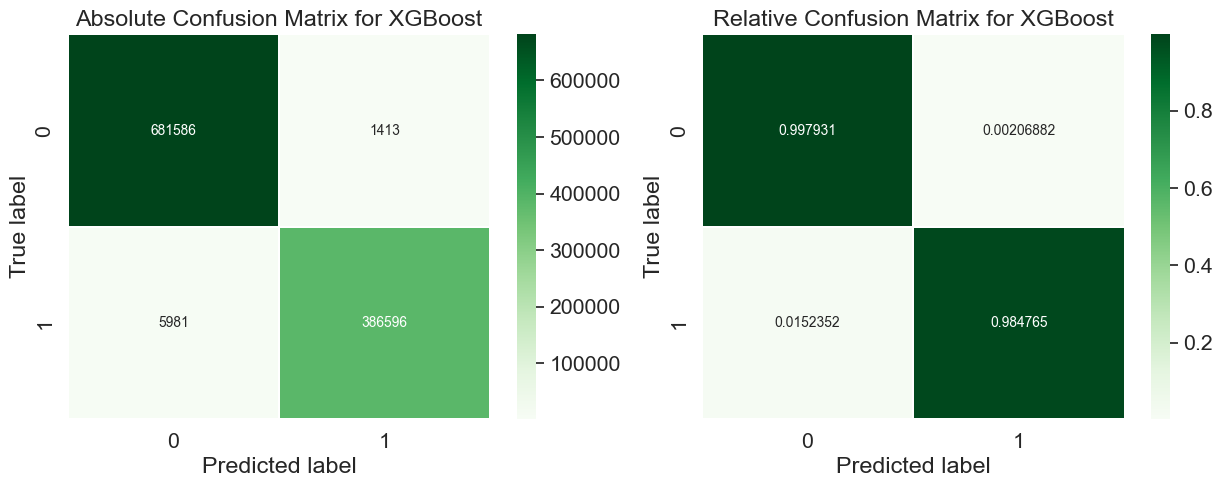

In [44]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

## Max the Precision for comparsion with Plny et al.

In [45]:
y_pred_proba = best_model.predict_proba(X_test)

In [46]:
t = None
best = 0
for _t in range(80, 100, 1):
    _t = _t / 100

    y_pred = []
    for p_0, p_1 in y_pred_proba:
        if p_1 >= _t:
            y_pred.append(1)
        else:
            y_pred.append(0)   
            
    accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
    precision = precision_score(y_test, y_pred)  * 100
    recall = recall_score(y_test, y_pred)  * 100
    F1 = f1_score(y_test, y_pred)  * 100
    print(t, _t, accuracy, precision, recall, F1)
    if precision >= 99.99 and F1 > best:
        best = F1
        t = _t
best, t

None 0.8 99.92328851912272 99.98655391161118 99.79007807370273 99.88821937786648
None 0.81 99.91983156397589 99.98847317612027 99.77809622859444 99.88317392691533
None 0.82 99.91785616103485 99.98943293274543 99.77138639533379 99.88029066099227
None 0.83 99.91472843971152 99.990872800465 99.76084237163849 99.87572513663036
0.83 0.84 99.90962531544716 99.99087144106315 99.74598488370421 99.86827804130166
0.83 0.85 99.90452219118279 99.9913505201701 99.73064812196559 99.86082917020593
0.83 0.86 99.89826674853614 99.99182947636555 99.71195644359666 99.85169684723814
0.83 0.87 99.89168207206599 99.99182790529984 99.6927854914234 99.84208277934307
0.83 0.88 99.88443892794882 99.99230691560206 99.67121817022847 99.83150436360495
0.83 0.89 99.8748911470671 99.99470927464156 99.64102392055557 99.81755329364317
0.83 0.9 99.86583721692064 99.99566999595866 99.61370531370866 99.80432219850613
0.83 0.91 99.85299709780384 99.99663088992637 99.57536340936214 99.78555253242529
0.83 0.92 99.8411446801

(99.87572513663036, 0.83)

In [47]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    
y_pred_proba = best_model.predict_proba(X_validation)

In [48]:
y_pred_proba

array([[1.9425154e-04, 9.9980575e-01],
       [9.8167092e-01, 1.8329106e-02],
       [9.9975729e-01, 2.4272435e-04],
       ...,
       [9.9066383e-01, 9.3361782e-03],
       [9.9993944e-01, 6.0573893e-05],
       [9.9999809e-01, 1.9042561e-06]], dtype=float32)

In [50]:
y_pred = []
for p_0, p_1 in y_pred_proba:
    if p_1 >= 0.98:
        y_pred.append(1)
    else:
        y_pred.append(0)    

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}97.32 & 99.99 & 92.66 & 96.19 \\
\hline



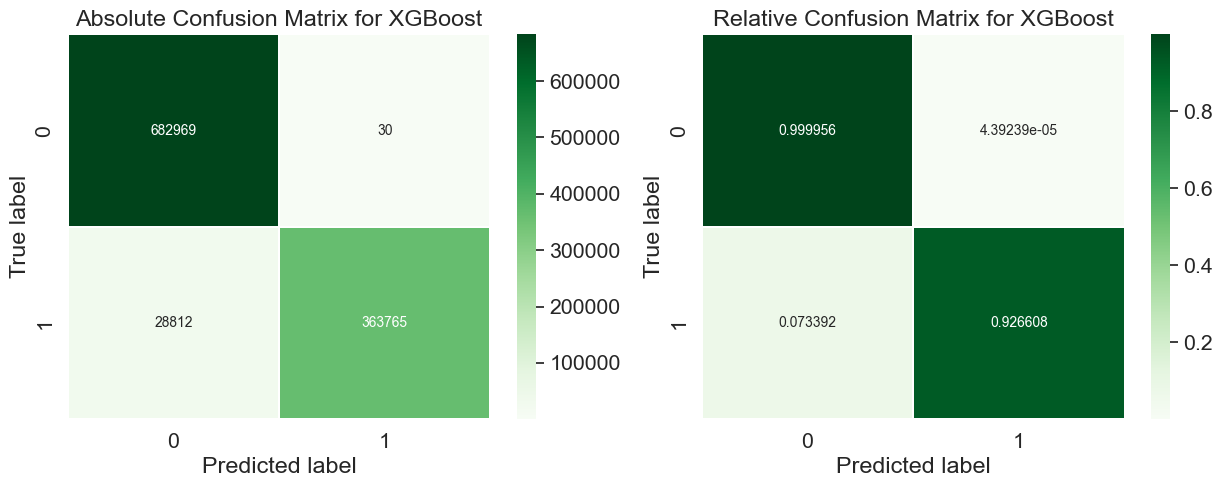

In [51]:

accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

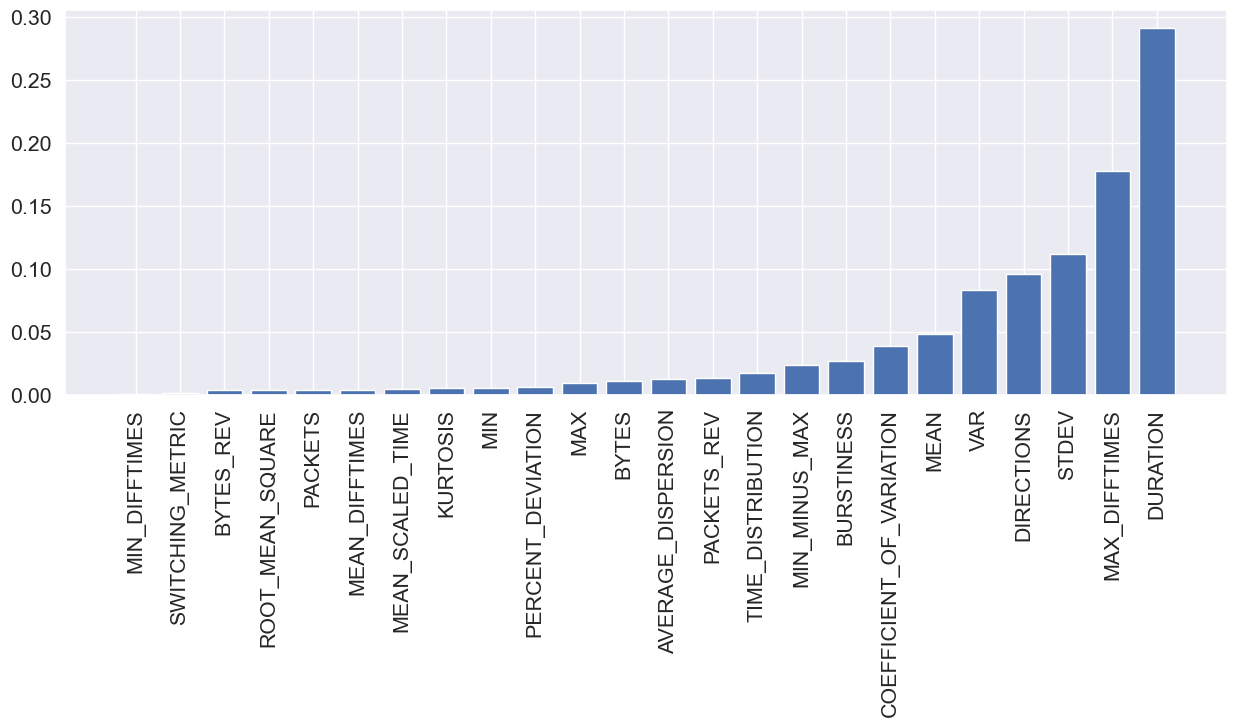

In [52]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [53]:
feat_importances.to_dict()

{'MIN_DIFFTIMES': 0.0010147690773010254,
 'SWITCHING_METRIC': 0.0015551385004073381,
 'BYTES_REV': 0.0036221726331859827,
 'ROOT_MEAN_SQUARE': 0.003840111428871751,
 'PACKETS': 0.003953408449888229,
 'MEAN_DIFFTIMES': 0.004052771255373955,
 'MEAN_SCALED_TIME': 0.004642767831683159,
 'KURTOSIS': 0.005201041232794523,
 'MIN': 0.005526787135750055,
 'PERCENT_DEVIATION': 0.006093231961131096,
 'MAX': 0.009167368523776531,
 'BYTES': 0.011034843511879444,
 'AVERAGE_DISPERSION': 0.012488126754760742,
 'PACKETS_REV': 0.013760274276137352,
 'TIME_DISTRIBUTION': 0.017134781926870346,
 'MIN_MINUS_MAX': 0.02366550639271736,
 'BURSTINESS': 0.026623595505952835,
 'COEFFICIENT_OF_VARIATION': 0.03923247009515762,
 'MEAN': 0.04868057370185852,
 'VAR': 0.08320783823728561,
 'DIRECTIONS': 0.09600482881069183,
 'STDEV': 0.11147662997245789,
 'MAX_DIFFTIMES': 0.1772872507572174,
 'DURATION': 0.29073366522789}